# Loading of the Iris (flowers) dataset

In [1]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Configuring and preparing the dataset + data visualization

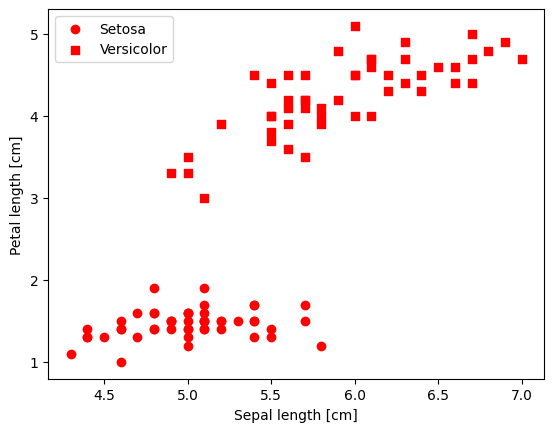

In [9]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # .iloc allows to access to a specific numeric index of the dataframe.
                             # Dataframes may have labels as indexes, so it's useful to target records
                             # with numbers instead of everything else.

                             # .values it's used to obtain a numpy array reather than using a pandas
                             # dataframe.
y = np.where(y == 'Iris-setosa', 0, 1) # extracting class labels

X = df.iloc[0:100, [0, 2]].values # extracting sepal length and petal length

plt.scatter(X[y==0,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[y==1,0],X[50:100,1],color='red',marker='s',label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Missclassification errors against the number of epochs

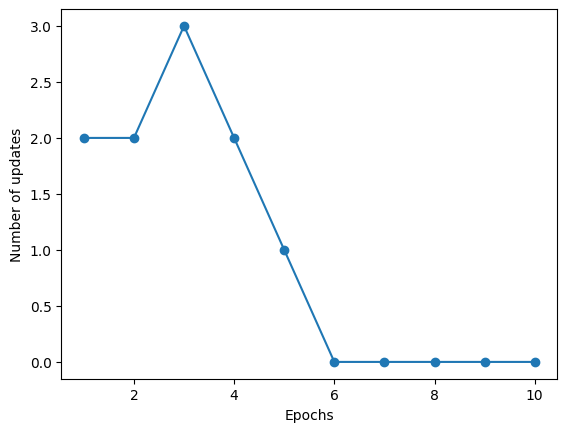

In [10]:
from Perceptron import Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Decision boundary visualization

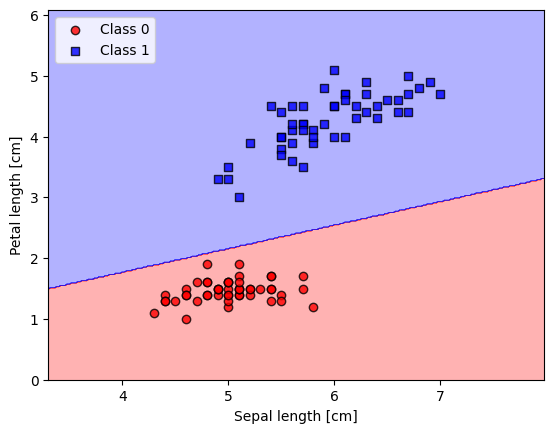

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X: np.ndarray,y: np.ndarray, classifier: Perceptron, resolution: float = 0.02):
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 # extracting min and max for the first feature
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 # extracting min and max for the second feature
    
    """
    Everything until the contour function (comprehended) it's used to generate a list of dots in the surface, to use to make
    predictions. Those predictions will be used by the contour function to create contour regions.
    """
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min,x1_max,resolution), # it makes a fake range of values, comprehended in the true range of the first feature
        np.arange(x2_min,x2_max,resolution) # it makes a fake range of values, comprehended in the true range of the second feature
    )
    # Practically speaking, the meshgrid makes it possible to evaluate the function (represented by the perceptron) on evenly
    # spaced (depending on the selected resolution) points.

    lab = classifier.predict(np.array([
        xx1.ravel(), # it makes the xx1 matrix in vector form (1 dimension, following the correct order)
        xx2.ravel() # it makes the xx2 matrix in vector form (1 dimension, following the correct order)
    ]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2, lab, alpha=0.3, cmap = cmap) # it draws contour areas based on the coordinates of a mesh grid
                                                       # - xx1 is the X axis
                                                       # - xx2 is the Y axis
                                                       # - lab is the Z axis (corresponding to the predictions)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # that's simply used to plot the single points of the different classes
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],
                    y=X[y == cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors= 'black')

plot_decision_regions(X, y,classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Using AdalineGD neuron architecture

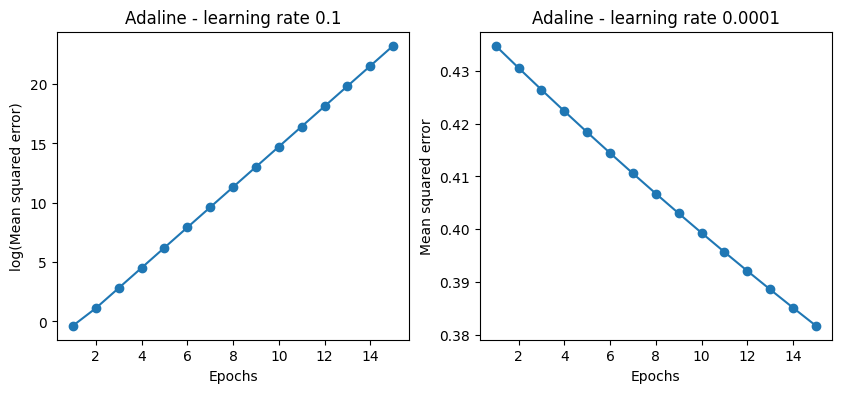

In [17]:
from AdalineGD import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=15,eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1),np.log10(ada1.losses_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - learning rate 0.1')

ada2 = AdalineGD(n_iter=15,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1),ada2.losses_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - learning rate 0.0001')
plt.show()